# Task 5: To Explore Business Analytics ,Performing  ‘Exploratory Data Analysis’ on the provided dataset
# ‘SampleSuperstore.csv’  
## In this particular task we will work with a ‘SampleSuperstore' data set, As a business manager, trying  to find out the weak areas where you I ,can concentrate to make more profit By performing 'Data Analysis’. 

In [11]:
import pandas as pd#Importing all the libraries
import numpy as np
import random 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import seaborn as sns
#import missingno as msno

In [12]:
data_1 = pd.read_csv("SampleSuperstore.csv")#loading the data

In [13]:
data_1.head(5)#viewing the first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
data_1.info() #checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [16]:
data_1.describe() #describing the stats

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
#cheking any missing values
data_1.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [18]:
#checking the unique values
data_1["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

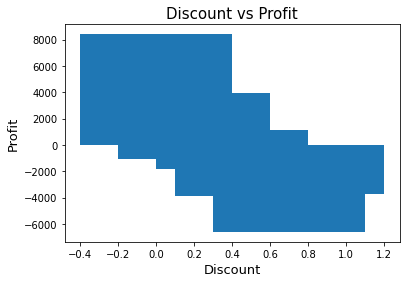

In [19]:
 #creating a scatter plot in btweeen features 
plt.bar('Discount','Profit',data=data_1)
plt.title('Discount vs Profit',size= 15)
plt.xlabel('Discount',size= 13)
plt.ylabel('Profit',size= 13)
plt.show()

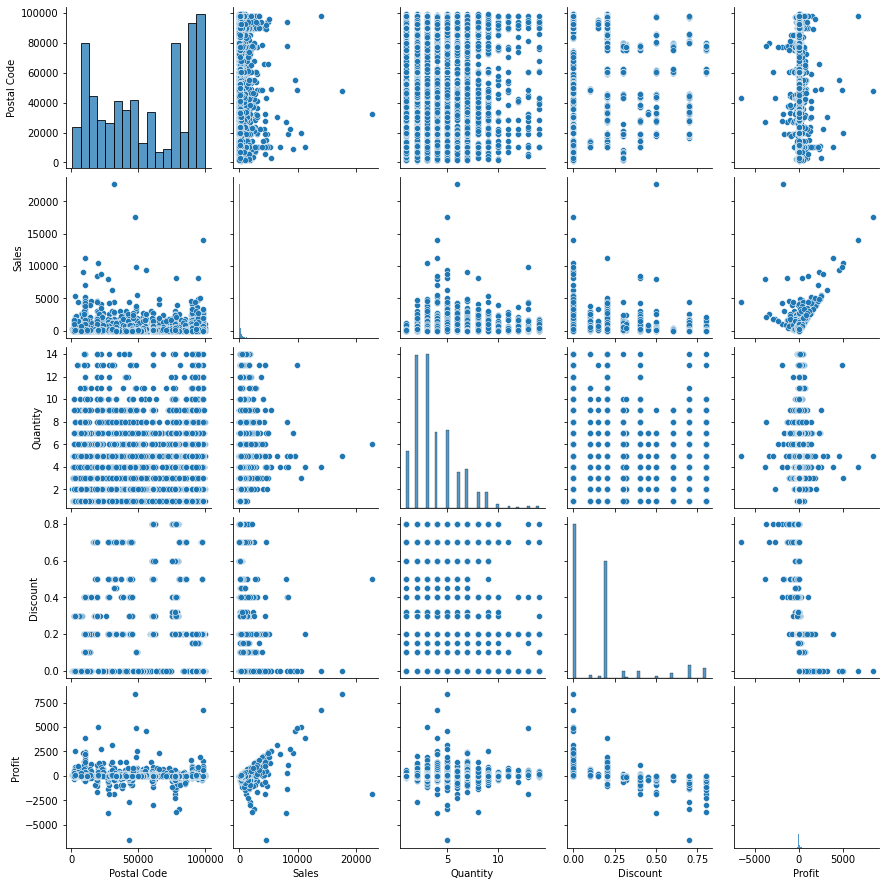

In [20]:
# visualising th entire data
sns.set_palette('tab10')
sns.pairplot(data_1)
plt.show()


       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


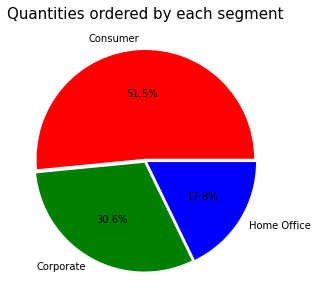

In [21]:
df_group = data_1.groupby('Segment')['Quantity'].sum().reset_index()
print(df_group)
labels = data_1['Segment'].unique()
colors = ['red', 'green', 'blue']
plt.figure(figsize=(5,5))
plt.pie(df_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


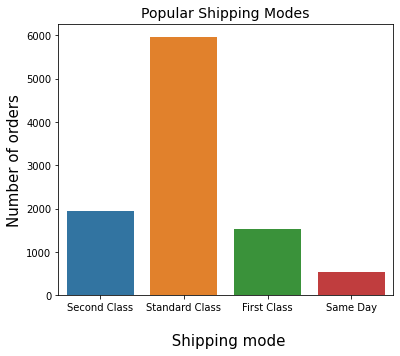

In [22]:

#Shipping Models

plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=data_1, palette='tab10')
plt.title('Popular Shipping Modes',size=14)
plt.xlabel('\n Shipping mode',size=15)
plt.ylabel('Number of orders',size=15)
plt.xticks(fontsize=10)
plt.show()

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


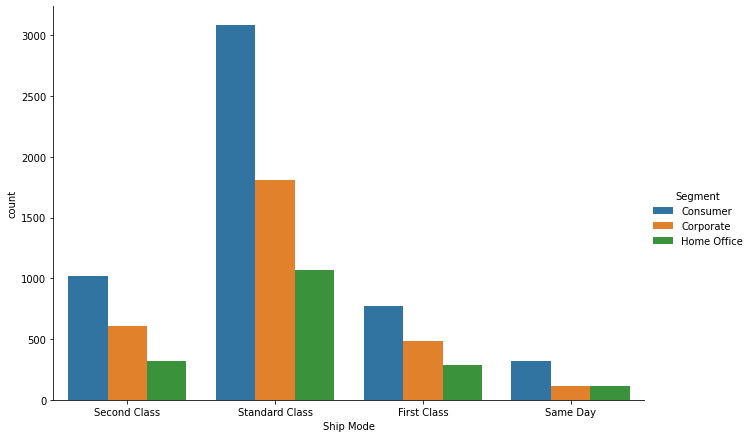

In [23]:

#Shipping Mode vs Count
sns.catplot('Ship Mode',data=data_1,hue='Segment',kind='count',palette='tab10',aspect=1.5,height=6)
plt.show()

In [47]:

# counts of state Unique Values

counts_data = data_1['State'].value_counts()
counts_data.head(5)

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


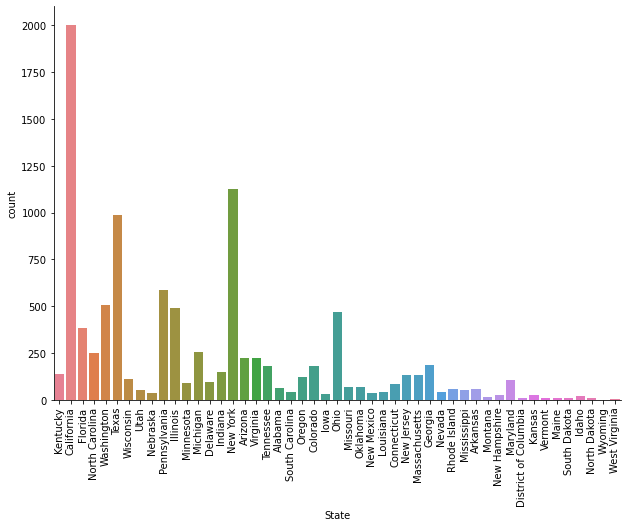

In [25]:

#Cities each of Least and Most Quantities Ordered

sns.catplot('State',kind='count',data=data_1,palette='husl',height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [45]:
#knowing the  Quantity of Cities

dftop10 = data_1.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10.head(5)

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1


In [43]:

#Top 10 Cities

dftop10 = dftop10.head(5)
dftop10.reset_index(drop=True,inplace=True)
dftop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1


    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


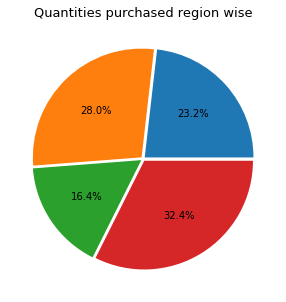

In [28]:

#Quantities purchased Region Wise

df_region=data_1.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

labels = df_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities purchased region wise',size=13)

plt.show()

In [29]:

#Highest Selling Categories

df_cats = data_1.groupby('Category')['Quantity'].sum().reset_index()
df_cats

,Category,Quantity
0,Furniture,8028
1,Office Supplies,22906
2,Technology,6939


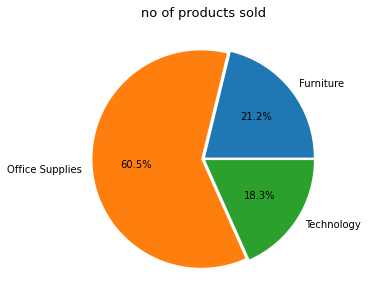

In [30]:

# no of Products Sold

plt.figure(figsize=(5,5))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('no of products sold',size=13)

plt.show()


          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


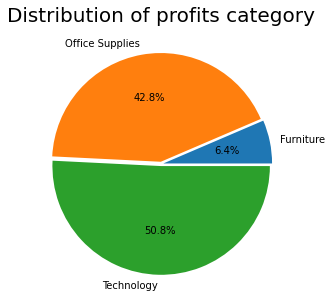

In [31]:
#Most Profitable Categories

dfprofit = data_1.groupby('Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(5,5))
labels=dfprofit['Category'].unique()
plt.pie(dfprofit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of profits category',size=20)
plt.show()

In [42]:

#Most Profitable Products

dftop10_items = data_1.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_items.reset_index(drop=True,inplace=True)
dftop10_items=dftop10_items.head(5)
dftop10_items

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


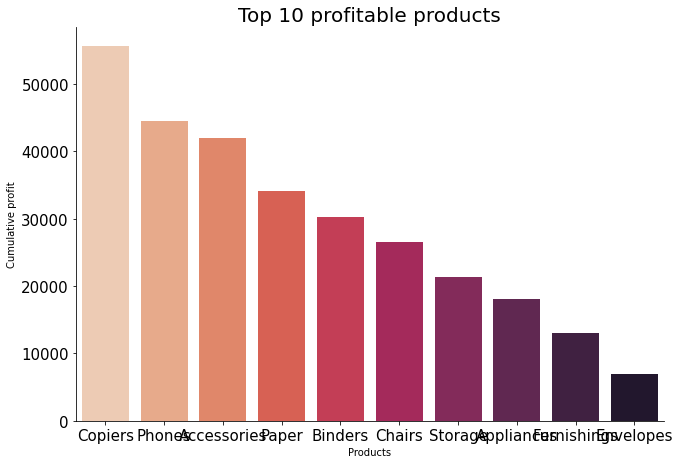

In [41]:
#Visualizing the Top 10 Profitable Products

sns.catplot('Sub-Category','Profit',data=dftop10_items,kind='bar',aspect=1.5,height=6,palette='rocket_r')
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=10)
plt.xlabel('Products',size=10)

plt.show()

In [40]:

#Top 10  cities which is getting highest profits

dftop10_cities = data_1.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

dftop10_cities = dftop10_cities.head(5)
dftop10_cities

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


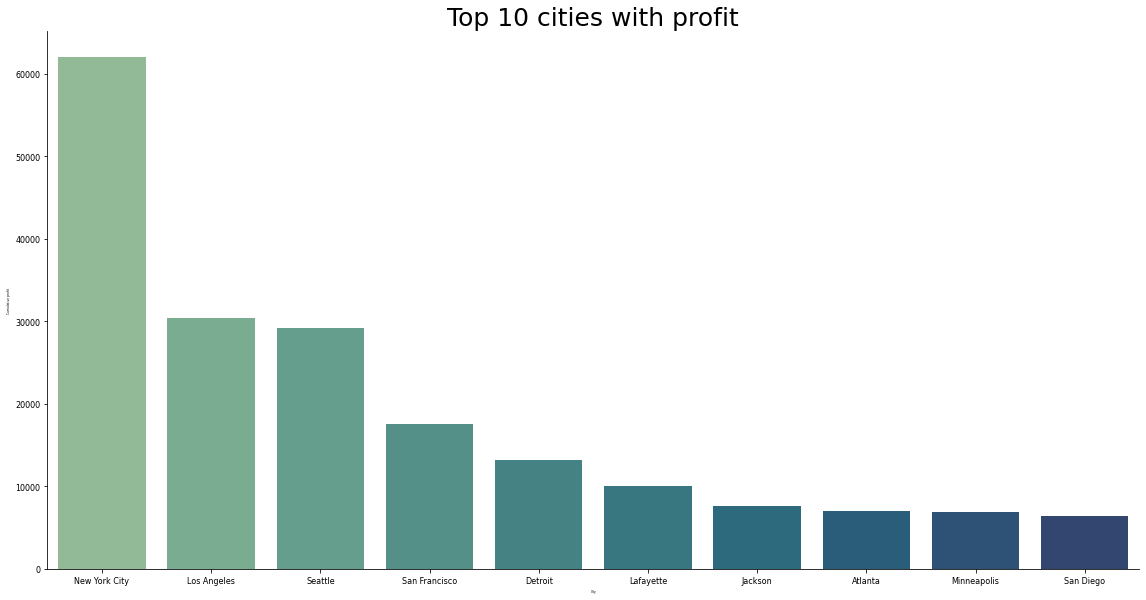

In [39]:
#Visualizing the Top Cities whih is getting more profit

sns.catplot('City','Profit',data=dftop10_cities,kind='bar',aspect=2,height=8,palette='crest')
plt.title('Top 10 cities with profit',size=25)
plt.xticks(size=8)
plt.yticks(size=8)
plt.ylabel('Cumulative profit',size=3)
plt.xlabel('City',size=3)

plt.show()

# Conclusion:
## So as we perfomed Data analysis on the above dataset  by the analysis As a business manager i can clearly see My profits and loss and can concentrate more on getting profits rather than loss.